In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### **2.1/ FREQUENCY DISTRIBUTIONS FOR QUANTITATIVE DATA**

- Definition:
    + Frequency Distribution: a collection of observations produced by sorting observations into classes and showing their frequency (f) of occurrence in each class.
    + Frequency Distribution for Ungrouped Data: a Frequency Distribution produced whenever observations are sorted into classes of single values.

#### **Not Always Appropriate:**
- Since Frequency Distribution (FQ) for ungrouped data consists of only classes of single values, when the number exceeds approximately 20 classes, it might be inconvenient for people to read and convey the meaning of the FQ.

**Progress Check 2.1: Students in a theater arts appreciation class rated the classic film The Wizard of Oz on a 10-point scale, ranging from 1 (poor) to 10 (excellent), as follows:** <br>
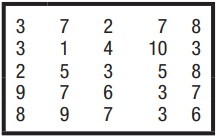 <br>
Since the number of possible values is relatively small—only 10—it’s appropriate to construct a frequency distribution for ungrouped data. Do this.

In [ ]:
# Solution:
data_str = "3 7 2 7 8 3 1 4 10 3 2 5 3 5 8 9 7 6 3 7 8 9 7 3 6"
data = np.array(data_str.split(), dtype=np.int8)
freq_dist = pd.DataFrame(data=data, columns=["Rating"]).groupby("Rating").size()
freq_dist = pd.DataFrame(data={"Rating": freq_dist.index,
                               "f": freq_dist.values})
freq_dist.index.name = "Index"
freq_dist

#### **Grouped Data:**
- Definition:
    + Frequency Distribution for Grouped Data: produced whenever observations are sorted into classes of more than one value.

In [ ]:
# Example:
data_str = "240–249 1 230–239 0 220–229 3 210–219 0 200–209 2 190–199 4 180–189 3 170–179 7 160–169 12 150–159 17 140–149 1 130–139 3"
classes = data_str.split()[::2]
freq = data_str.split()[1::2]
freq_dist = pd.DataFrame(data=freq, 
                         index=classes
                         , columns=["f"])
freq_dist.index.name = "Weight"
freq_dist

### **2.2/ GUIDELINES**

#### **How Many Classes?**
- The goal: to produce a concise description of data.

#### **When There Are Either Many or Few Observations:**
- General rule of thumb for the number of classes within a Frequency Distribution:
    + 10 classes

#### **Gaps between Classes:**
- Definition:
    + Unit of Measurement: the smallest possible difference between scores.
- The size of gap should always equal one Unit of Measurement.
- Guidelines for Frequency Distributions: <br>
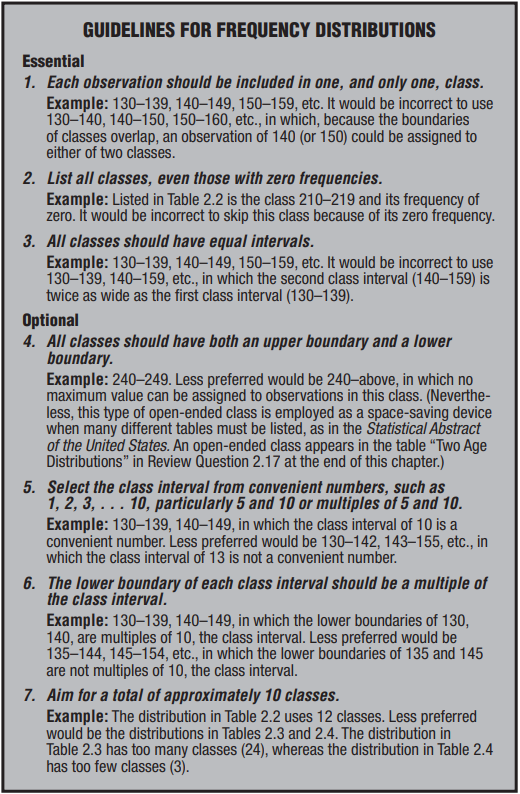

#### **Real Limits of Class Intervals:**
- Definition:
    + Real Limits: located at the midpoint of the gap between adjacent tabled boundaries.
- Due to the nature of continuous data, some reported data might come with decimal points, so that to preserve the concise property of the description, one should round up/down the data to the nearest integer, therefore, the classes that appear in a Frequency Distribution have their real limits expand by $\frac{1}{2}$ of one Unit of Measurement. <br>
For example: the real limits for 140-149 class are 139.5 (lower) and 149.5 (upper).

#### **Constructing Frequency Distributions:**
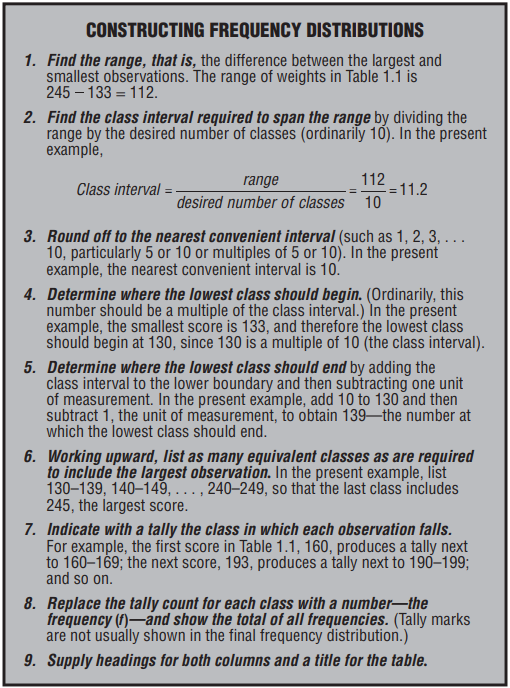

**Progress Check 2.2: The IQ scores for a group of 35 high school dropouts are as follows:** <br>
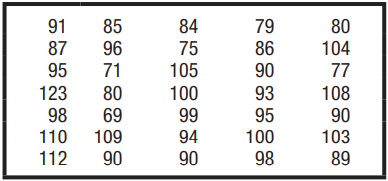 <br>
(a) Construct a frequency distribution for grouped data. <br>
(b) Specify the real limits for the lowest class interval in this frequency distribution. <br>
Lowest class interval is 65-70, so that the real limits are: <br>
- Lower limit = 65 - (0.5 * 1) = 64.5
- Upper limit = 69 + (0.5 * 1) = 69.5

In [ ]:
# Solution:
data_str = "91 85 84 79 80 87 96 75 86 104 95 71 105 90 77 123 80 100 93 108 98 69 99 95 90 110 109 94 100 103 112 90 90 98 89"
data = np.sort(np.array(data_str.split(), dtype=np.int16))

class_range = data.max() - data.min()
num_of_class = 10
interval = class_range // num_of_class
begin = data.min() - (data.min() % interval)
while((num_of_class * interval + begin) < data.max()):
    num_of_class += 1

final_data = dict(classes=list(), occurrence=list())
for idx in range(num_of_class):
    final_data["classes"].append("{0}-{1}".format(begin, begin + interval - 1))
    count = data[(data >= begin) & (data <= begin + interval - 1)].size
    final_data["occurrence"].append(count)
    begin = begin + interval

freq_dist = pd.DataFrame(data=final_data["occurrence"],
                         index=final_data["classes"],
                         columns=["f"])
freq_dist.index.name = "IQ Scores"
freq_dist

In [ ]:
class_range, interval, begin

**Progress Check 2.3: What are some possible poor features of the following frequency distribution?** <br>
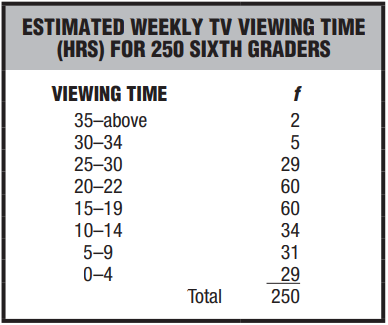 <br>
- Interval: unequal intervals among classes.
- Gap: the gap between 20-22 and 25-30 classes is greater than one Unit of Measurement, so that it may cause loss of data.
- Boundary: 
    + the highest class does not include an upper boundary, so that readers will not know the maximum number of viewing hours;
    + overlapped boundaries between 25-30 and 30-34 classes causes confusion that which class the 30 hours viewing time should lie in.

### **2.3/ OUTLIERS**

- Definition:
    + Outlier: a very extreme score (compared to the regularly-seen scores in the dataset).

#### **Check for Accuracy:**
- Any Outliers that appear in a dataset should be examined if possible of their accuracies.

#### **Might Exclude from Summaries:**
- Outliers might cause the Frequency Distributions to have very large intervals, which do not imply anything meaningful about the data, rather bring confusion to the readers, so that one might choose to leave the outliers in the footnote or in some special remarks in the study minutes.

#### **Might Enhance Understanding:**
- If accurate, outliers indicate the impact of special events on the observations.

**Progress Check 2.4: Identify any outliers in each of the following sets of data collected from nine college students.** <br>
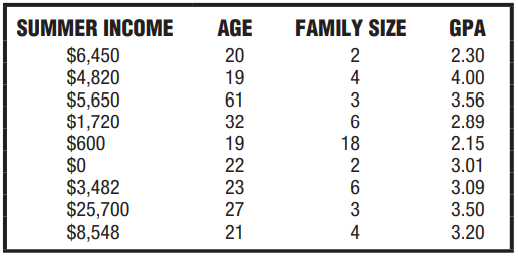 <br>
- Answer: the outliers are
    + In "Summer Income": 25.700$
    + In "Age": 61
    + In "Family Size": 18

In [ ]:
# Solution:
data_str = ["$6,450 20 2 2.30",
            "$4,820 19 4 4.00",
            "$5,650 61 3 3.56",
            "$1,720 32 6 2.89",
            "$600 19 18 2.15",
            "$0 22 2 3.01",
            "$3,482 23 6 3.09",
            "$25,700 27 3 3.50",
            "$8,548 21 4 3.20"]
data_dict = {
    "Summer Income": list(),
    "Age": list(),
    "Family Size": list(),
    "GPA": list()
}
for string in data_str:
    string = string.split()
    string[0] = string[0].replace('$', '')
    string[0] = string[0].replace(',', '')
    data_dict["Summer Income"].append(string[0])
    data_dict["Age"].append(string[1])
    data_dict["Family Size"].append(string[2])
    data_dict["GPA"].append(string[3])

df = pd.DataFrame(data=data_dict)
df = df.astype("float64")

plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(16, 9))
fig.subplots_adjust(hspace=0.4)
loc = 1
for col in df.columns:
    ax = fig.add_subplot(2, 2, loc)
    ax.scatter(x=df.index, y=df[col])
    ax.set_title(col)
    if loc == 1:
        ax.yaxis.set_major_locator(plt.IndexLocator(base=5000, offset=df[col].min()))
    loc += 1

### **2.4/ RELATIVE FREQUENCY DISTRIBUTIONS**

- Definition:
    + Relative Frequency Distribution: a FQ showing the frequency of each class as a fraction of the total frequency of the entire distribution.
- Meaning:
    + Relative FQ indicates the weight/importance of each class within a distribution.

#### **Constructing Relative Frequency Distribution:**

In [ ]:
freq_str = "1 0 3 0 2 4 3 7 12 17 1 3"
freq = np.array(freq_str.split(), dtype=np.int8)
classes = list()
end = 249
for i in range(freq.size):
    classes.append("{0}-{1}".format(end - 9, end))
    end -= 10
    
freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
freq_dist["Relative f"] = (freq_dist['f'] / freq_dist['f'].sum()).round(decimals=2)
freq_dist

#### **Percentages or Proportions?**

**Progress Check 2.5: GRE scores for a group of graduate school applicants are distributed as follows:** <br>
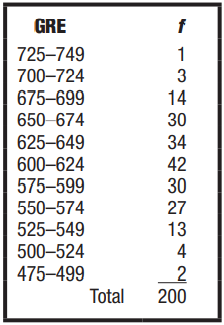 <br>
Convert to a relative frequency distribution. When calculating proportions, round numbers to two digits to the right of the decimal point, using the rounding procedure specified in Section A.7 of Appendix A.

In [ ]:
data_str = ["725–749 1",
            "700–724 3",
            "675–699 14",
            "650–674 30",
            "625–649 34",
            "600–624 42",
            "575–599 30",
            "550–574 27",
            "525–549 13",
            "500–524 4",
            "475–499 2"]
data_str = " ".join(data_str).split()
classes = data_str[::2]
freq = np.array(data_str[1::2], dtype=np.int8)

freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
freq_dist["Relative f"] = (freq_dist['f'] / freq_dist['f'].sum()).round(decimals=2)
freq_dist

### **2.5/ CUMULATIVE FREQUENCY DISTRIBUTIONS**

- Definition:
    + Cumulative Frequency Distribution: a FQ showing the total number of observations in each class and all lower-ranked classes.
- Meaning:
    + While Relative FQ shows the importance of a single class, the Cumulative FQ shows the importance of a range of classes within a distribution.
- Requirement:
    + Cumulative Frequency Distribution should only be applied for ordered dataset.

#### **Constructing Cumulative Frequency Distribution:**

In [ ]:
freq_str = "1 0 3 0 2 4 3 7 12 17 1 3"
freq = np.array(freq_str.split(), dtype=np.int8)
classes = list()
end = 249
for i in range(freq.size):
    classes.append("{0}-{1}".format(end - 9, end))
    end -= 10
    
freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
freq_dist["Cumulative f"] = freq_dist['f'][::-1].cumsum()
freq_dist["Cumulative Percent"] = (freq_dist["Cumulative f"] / freq_dist['f'].sum()).round(decimals=2) * 100
freq_dist

#### **Cumulative Percentages:**

**Progress Check 2.6:** <br>
(a) Convert the distribution of GRE scores shown in Question 2.5 to a cumulative frequency distribution. <br>
(b) Convert the distribution of GRE scores obtained in Question 2.6(a) to a cumulative percent frequency distribution. <br>

In [ ]:
# Solution:
freq_dist["Cumulative f"] = freq_dist['f'][::-1].cumsum()
freq_dist["Cumulative Percent"] = (freq_dist["Cumulative f"] / freq_dist['f'].sum()).round(decimals=3) * 100
freq_dist

#### **Percentile Ranks:**
- Definition:
    + Percentile Ranks of an Observation: percentage of scores in the entire distribution with equal or smaller values than that score.
- When used to describe the relative position of any score within its parent distribution, cumulative percentages are referred to as percentile ranks.

#### **Approximate Percentile Ranks (from Grouped Data):**
- The Cumulative Percentage is especially designed for Ungrouped Data due to the need for its precision. When applied on Grouped Data, the Cumulative Percentage can only be taken as ***approximate*** Percentile Rank.

**Progress Check 2.7: Referring to Table 2.6, find the approximate percentile rank of any weight in the class 200–209.** <br>
92 approximate percentile rank

### **2.6/ FREQUENCY DISTRIBUTIONS FOR QUALITATIVE (NOMINAL) DATA**

#### **Ordered Qualitative Data:**

#### **Relative and Cumulative Distributions for Qualitative Data:**

**Progress Check 2.8: Movie ratings reflect ordinal measurement because they can be ordered from most to least restrictive: NC-17, R, PG-13, PG, and G. The ratings of some films shown recently in San Francisco are as follows:** <br>
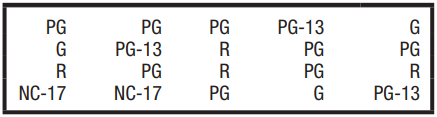 <br>
(a) Construct a frequency distribution. <br>
(b) Convert to relative frequencies, expressed as percentages. <br>
(c) Construct a cumulative frequency distribution. <br>
(d) Find the approximate percentile rank for those films with a PG rating. <br>
The approximate percentile rank for films with a PG rating: 55

In [2]:
# Solution:
data = "PG PG PG PG-13 G G PG-13 R PG PG R PG R PG R NC-17 NC-17 PG G PG-13"
ser = pd.Series(data=data.split())
classes = list()
freq = list()
for gr in ser.groupby(by=ser.values):
    classes.append(gr[0])
    freq.append(gr[1].size)
    
freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
ordered_classes = ["NC-17", "R", "PG-13","PG", "G"]
freq_dist = freq_dist.loc[ordered_classes]
freq_dist["Relative f(%)"] = (freq_dist['f'] / freq_dist['f'].sum()).round(decimals=2) * 100
freq_dist["Cumulative f"] = freq_dist['f'][::-1].cumsum()
freq_dist["Cumulative Percent"] = freq_dist["Relative f(%)"][::-1].cumsum()
freq_dist

,f,Relative f(%),Cumulative f,Cumulative Percent
NC-17,2,10.0,20,100.0
R,4,20.0,18,90.0
PG-13,3,15.0,14,70.0
PG,8,40.0,11,55.0
G,3,15.0,3,15.0


### **2.7/ INTERPRETING DISTRIBUTIONS CONSTRUCTED BY OTHERS**

### **2.8/ GRAPHS FOR QUANTITATIVE DATA**

#### **Histograms:**
- Definition: a bar-type graph for quantitative data. The common boundaries between adjacent bars emphasize the continuity of the data, as with continuous variable.

In [6]:
# Constructing the histogram:
freq_str = "1 0 3 0 2 4 3 7 12 17 1 3"
freq = np.array(freq_str.split(), dtype=np.int8)
classes = list()
end = 249
for i in range(freq.size):
    classes.append("{0}-{1}".format(end - 9, end))
    end -= 10

freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
freq_dist["Relative f"] = (freq_dist['f'] / freq_dist['f'].sum()).round(decimals=2)

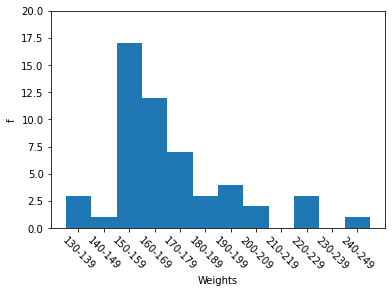

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.bar(x=freq_dist.index[::-1],
       height=freq_dist['f'][::-1],
       width=1)

import matplotlib.ticker as mticker
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(labels=freq_dist.index[::-1],
                   fontdict={"fontsize": 10}, 
                   rotation=-45)
ax.set_xlabel(xlabel="Weights")
ax.set_ylabel(ylabel='f')
ax.set_ylim(0, 20);

#### **Frequency Polygons:**
- Definition: a line graph for quantitative data that also emphasizes the continuity of continuous variables.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

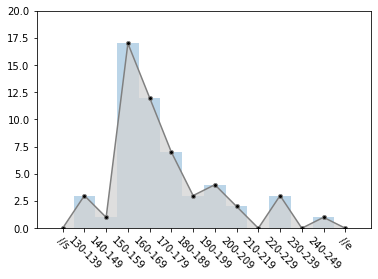

In [8]:
# Constructing the polygon:
fig = plt.figure()
ax = plt.axes()

classes = [str(f"//s")] + list(freq_dist.index[::-1]) + [str(f"//e")]
freq = [0] + list(freq_dist['f'][::-1]) + [0]

ax.bar(x=classes, 
       height=freq,
       width=1, alpha=0.3)

import matplotlib.ticker as mticker
ticks_loc = ax.get_xticks()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels(labels=classes,
                   fontdict={"fontsize": 10},
                   rotation=-45)
ax.set_ylim(0, 20)

ax.plot(classes, freq, 
        marker='.', markersize=8,
        markerfacecolor="black", color="gray")
ax.fill_between(classes, freq, 
                facecolor="lightgray", alpha=0.75)

**Progress Check 2.9: The following frequency distribution shows the annual incomes in dollars for a group of college graduates** <br>
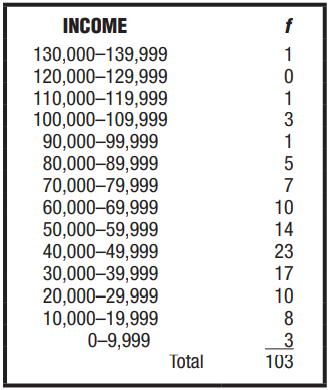 <br>
(a) Construct a histogram. <br>
(b) Construct a frequency polygon. <br>
(c) Is this distribution balanced or lopsided? <br>
- The distribution is left-lopsided.

C:\Users\jio\AppData\Local\Temp\ipykernel_14456\580226646.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticks(),


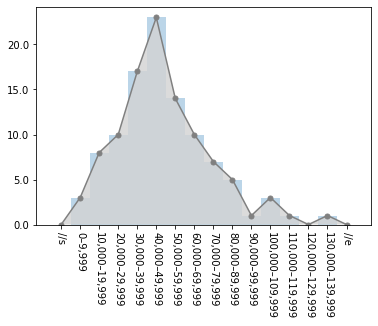

In [9]:
# Solution: 
data_str = ["130,000–139,999 1",
            "120,000–129,999 0",
            "110,000–119,999 1",
            "100,000–109,999 3",
            "90,000–99,999 1",
            "80,000–89,999 5",
            "70,000–79,999 7",
            "60,000–69,999 10",
            "50,000–59,999 14",
            "40,000–49,999 23",
            "30,000–39,999 17",
            "20,000–29,999 10",
            "10,000–19,999 8",
            "0–9,999 3"]
data = " ".join(data_str).split()
classes = [str(f"//s")] + data[-2::-2] + [str(f"//e")]
freq = np.array([0] + data[::-2] + [0], dtype=np.int8)

fig = plt.figure()
ax = plt.axes()

ax.bar(x=classes, height=freq, 
       width=1, alpha=0.3)

import matplotlib.ticker as mticker
ax.xaxis.set_major_locator(mticker.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(labels=classes,
                   fontdict={"fontsize": 10},
                   rotation=-90);
ax.set_yticklabels(labels=ax.get_yticks(),
                   fontdict={"fontsize": 10})

ax.plot(classes, freq,
        marker='.', markersize=10,
        color="gray")
ax.fill_between(x=classes, y1=freq,
                facecolor="lightgray",
                alpha=0.8);

#### **Stem and Leaf:**
- Definition: a device for sorting quantitative data on the basis of leading and trailing digits.

In [ ]:
# Construct an uncomplete stem and leaf plot:
data_str = ["160 165 135 175","193 168 245 165",
            "226 169 170 185","152 160 156 154",
            "180 170 160 179","205 150 225 165",
            "163 152 190 206","157 160 159 165",
            "151 190 172 157","157 150 190 156",
            "220 133 166 135", "145 180 158", 
            "158 152 152", "172 170 156"]
data = np.sort(np.array(" ".join(data_str).split(), dtype=np.int16))
stem = data // 10
leaf = data - (stem * 10)

fig = plt.figure()
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(14))
ax.set_xlabel(xlabel="Stem")
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylabel(ylabel="Leaf")
ax.stem(stem, leaf);

#### **Scatter Plots:**

In [ ]:
age = np.random.randint(low=5, high=20, size=50)
iq_scores = np.random.randint(low=90, high=150, size=50)
df = pd.DataFrame(data={"Age": age,
                        "IQ": iq_scores})

genius = df.query("IQ >= 130")
smart = df.query("120 <= IQ < 130")
normal = df.query("(IQ < 120)")

fig = plt.figure()
ax = plt.axes()
ax.scatter(genius["Age"], genius["IQ"], color="red", label="genius")
ax.scatter(smart["Age"], smart["IQ"], color="blue", label="smart")
ax.scatter(normal["Age"], normal["IQ"], color="green", label="normal")

ax.legend(ncol=3, bbox_to_anchor=(0, 1.05), loc="lower left");

#### **Pie Charts:**

In [ ]:
u18 = np.random.randint(low=10**6, high=10**7, size=1)
adult = np.random.randint(low=10**6, high=10**7, size=1)
mid_age = np.random.randint(low=10**6, high=10**7, size=1)
old = np.random.randint(low=10**6, high=10**7, size=1)
pop = u18 + adult + mid_age + old

labels = ["Under 18", "Adult (18-40)", "Middle Age (>40-60)", "Old (>60)"]
sizes = [(np.round((u18 / pop), decimals=2) * 100)[0],
         (np.round((adult / pop), decimals=2) * 100)[0],
         (np.round((mid_age / pop), decimals=2) * 100)[0],
         (np.round((old / pop), decimals=2) * 100)[0]]
explodes = (0, 0.1, 0, 0)

fig = plt.figure()
ax = plt.axes()
ax.pie(sizes, explode=explodes, labels=labels, 
       autopct="%1.1f%%", shadow=True, startangle=45)
ax.set(aspect="equal");

#### **Box and Whisker Plots:**
- A plot that depicts four essential properties of a dataset:
    + The min, max values.
    + The median value (50 percentile rank).
    + The values of the $1^{st}$ quartile (25 percentile rank) and the $3^{rd}$ quartile (75 percentile rank).
    + The ranges of each quartile and especially the interquartile range (from $1^{st}$ to $3^{rd}$ quartile).
- Note: Box and Whisker is a very useful plot in detecting outliers and the range of central tendencies within a dataset.

In [ ]:
x = np.random.randint(low=0, high=10**5, size=1000)
np.quantile(x, [0.25, 0.50, 0.75])

In [ ]:
plt.boxplot(x);

#### **Dot Plots:**

In [ ]:
rng = np.random.default_rng(1)
data = rng.integers(low=1, high=21, size=100)
values, counts = np.unique(data, return_counts=True)

data_range = values.max() - values.min()
marker_sizes = 10 if data_range < 50 else np.ceil(30 / (data_range // 10))
width = data_range / 2 if data_range < 30 else 15
height = np.max(counts) / 3 if data_range < 50 else np.max(counts) / 4

fig = plt.figure(figsize=(width, height))
ax = plt.axes()
for value, count in zip(values, counts):
    ax.plot([value] * count, list(range(1, count + 1)),
            marker='o', ms=marker_sizes, 
            color="tab:blue", linestyle='')

for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
    
ax.set_ylim(0, counts.max() + 0.5)
ax.yaxis.set_visible(False)
ax.set_xticks(ticks=range(values.min(), values.max() + 1))
ax.tick_params(axis='x', length=0, pad=10)

#### **Line Graphs:**

In [ ]:
def format_func(value, tick):
    num = int(np.round(2 * value / np.pi))
    if num == 0:
        return '0'
    if num == 1:
        return r"$\pi/2$"
    if num == 2:
        return r"$\pi$"
    if num % 2 > 0:
        if num != -1:
            return r"{0}$\pi/2$".format(num)
        else:
            return r"-$\pi/2$"
    if num % 2 == 0:
        if num != -2:
            return r"{0}$\pi$".format(num // 2)
        else:
            return r"-$\pi$"

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = x

fig = plt.figure(figsize=(10, 5.625))
ax = plt.axes()
ax.plot(x, np.sin(x), label="Sin(x)")
ax.plot(y, np.cos(y), label="Cos(x)")

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.legend(bbox_to_anchor=(0, 1.02), ncol=2, loc="lower left");

### **2.9/ TYPICAL SHAPES**

#### **Normal Distribution:**
- Most observations center around the mean.

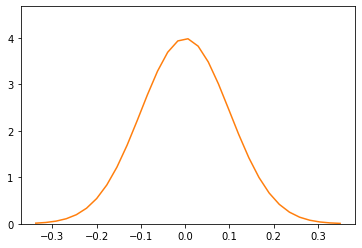

In [ ]:
mu, sigma = 0, 0.1
normal_dist = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(normal_dist, 30, facecolor="none", density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ));

#### **Bimodal Distribution:**
- Incorporates two different types of observations, each set of observations has an individual mean and a standard deviation.

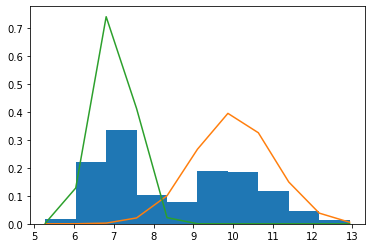

In [10]:
mu1, sigma1 = 10, 1
mu2, sigma2 = 7, 0.5
num = 1000

normal_dist1 = np.random.normal(mu1, sigma1, num)
normal_dist2 = np.random.normal(mu2, sigma2, num)

values, bins, patches = plt.hist(np.concatenate([normal_dist1, normal_dist2]), density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ));
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ));

#### **Positively Skewed Distribution:**
- Includes a few extreme observations in the positive direction (to the right of the majority of observations).
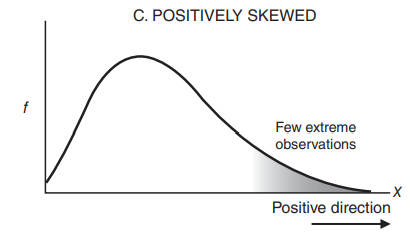

#### **Negatively Skewed Distribution:**
- Includes a few extreme observations in the negative direction (to the left of the majority of observations).<br>
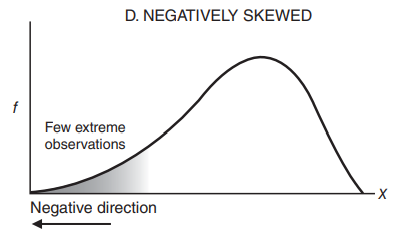

#### **Positively or Negatively Skewed:**

**Progress Check 2.11: Describe the probable shape—normal, bimodal, positively skewed, or negatively skewed—for each of the following distributions:** <br>
(a) female beauty contestants’ scores on a masculinity test, with a higher score indicating a greater degree of masculinity. <br>
Positively Skewed. <br>
(b) scores on a standardized IQ test for a group of people selected from the general population. <br>
Normal. <br>
(c) test scores for a group of high school students on a very difficult college-level math exam. <br>
Positively Skewed. <br>
(d) reading achievement scores for a third-grade class consisting of about equal numbers of regular students and learning-challenged students. <br>
Bimodal. <br>
(e) scores of students at the Eastman School of Music on a test of music aptitude (designed for use with the general population). <br>
Negatively Skewed.

### **2.10/ A GRAPH FOR QUALITATIVE (NOMINAL) DATA**

**Progress Check 2.12: Referring to the box “Constructing Graphs” on page 47 for stepby-step instructions, construct a bar graph for the data shown in the following table:** <br>
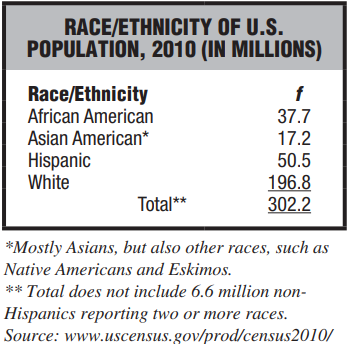

In [ ]:
# Solution:
data_str = ["African American 37.7",
            "Asian American* 17.2",
            "Hispanic 50.5",
            "White 196.8"]
races = list()
population = list()
for string in data_str:
    string = string.split()
    races.append(" ".join(string[:-1]))
    population.append(float(string[-1]))

fig = plt.figure()
ax = plt.axes()

ax.bar(races, population)

ax.xaxis.set_major_locator(plt.FixedLocator(ax.get_xticks()))
ax.set_xticklabels(labels=races, rotation=-45)
ax.set_xlabel("Races")
ax.set_ylabel("Population (in Millions)")

### **2.11/ MISLEADING GRAPHS**

**Progress Check 2.13: Criticize the graphs that appear here (ignore the inadequate labeling of both axes).** <br>
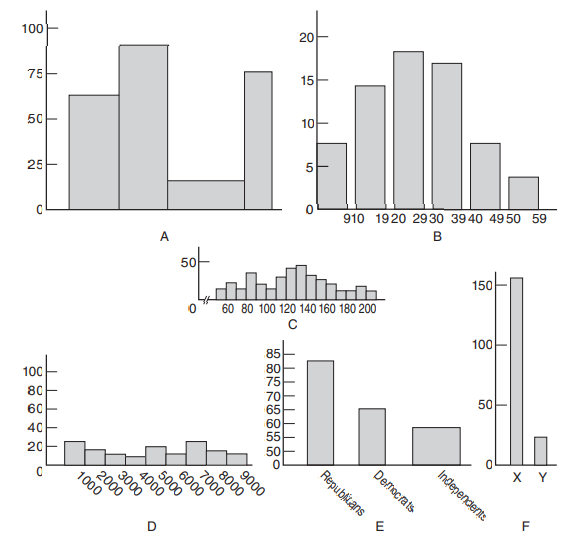 <br>
- A:
    + No classes or intervals along the horizontal axis.
    + Unequal widths of bars.
- B:
    + A histogram would be more appropriate.
    + Gaps between classes/intervals while the ticks represent a continuous variable.
    + No space between the first bar and the vertical axis, making the ticks overlap with the bar.
- C:
    + Unequal aspect between horizontal and vertical axis.
    + To few ticks on vertical axis.
    + No bar is classified individually.
    + There's no actual lower and upper limits for the variable.
- D:
    + Unequal aspect between horizontal and vertical axis.
    + The ticks do not precisely indicate the intervals.
    + Lacks of a 0.
    + There's no lower limit for each class.
- E:
    + Again, unequal aspect between horizontal and vertical axis.
    + Unequal widths of bars.
    + There is no wiggly lines along the vertical axis indicating a break between 0 and 50.
- F:
    + Unequal aspect between horizontal and vertical axis.
    + The labels on the horizontal axis are ambiguous.

### **2.12/ DOING IT YOURSELF**

#### **Guidelines for Constructing Graphs:**
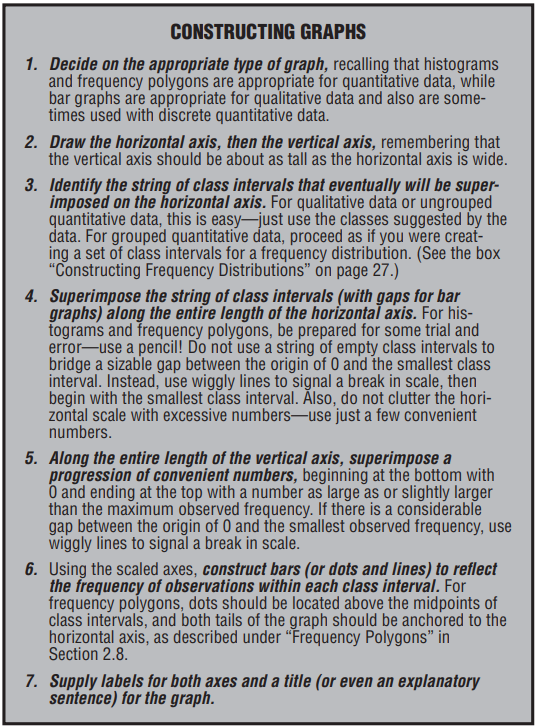

### **REVIEW QUESTIONS:**

#### **2.14.** <br>
(a) Construct a frequency distribution for the number of different residences occupied by graduating seniors during their college career, namely <br>
1, 4, 2, 3, 3, 1, 6, 7, 4, 3, 3, 9, 2, 4, 2, 2, 3, 2, 3, 4, 4, 2, 3, 3, 5. <br>
(b) What is the shape of this distribution? <br>
Positively Skewed.

In [ ]:
# Solution:
data = [1, 4, 2, 3, 3, 1, 6, 7, 4, 3, 3, 9, 2, 4, 2, 2, 3, 2, 3, 4, 4, 2, 3, 3, 5]
ser = pd.Series(data, dtype=np.int8)

classes, freq = np.unique(data, return_counts=True)

fig = plt.figure()
ax = plt.axes()

ax.bar(classes, freq, width=1, edgecolor='k')
ax.xaxis.set_major_locator(plt.FixedLocator(np.arange(classes.min(), classes.max() + 1)))
ax.set_title("Frequency Distribution");

#### **2.15. The number of friends reported by Facebook users is summarized in the following** 
frequency distribution:** <br>
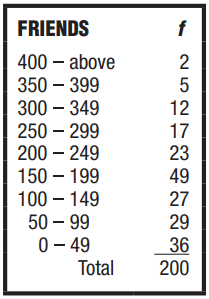 <br>
(a) What is the shape of this distribution? <br>
Positively Skewed. <br>
(b) Find the relative frequencies. <br>
(c) Find the approximate percentile rank of the interval 300–349. <br>
96.5. <br>
(d) Convert to a histogram. <br>
(e) Why would it not be possible to convert to a stem and leaf display? <br>
Because the data is listed in groups, steam and leaf display requires data to be listed individually.

In [ ]:
# Solution:
    # a) & d):
data_str = ["400 above 2",
            "350 399 5",
            "300 349 12",
            "250 299 17",
            "200 249 23",
            "150 199 49",
            "100 149 27",
            "50 99 29",
            "0 49 36"]

classes = list()
freq = list()
for string in data_str:
    string = string.split()
    classes.append("{0}-{1}".format(string[0], string[1]))
    freq.append(int(string[2]))

classes = classes[::-1]
freq = freq[::-1]
    
fig = plt.figure()
ax = plt.axes()
ax.bar(classes, freq, width=1, edgecolor='k')

ax.xaxis.set_major_locator(plt.FixedLocator(range(len(classes))))
ax.set_xticklabels(classes, rotation=-90);

In [ ]:
    # b):
freq_dist = pd.DataFrame(data=freq, index=classes, columns=['f'])
freq_dist["Relative f"] = freq_dist['f'] / freq_dist['f'].sum()
freq_dist

In [ ]:
    # c):
freq_dist["Cumulative Percent"] = freq_dist["Relative f"].cumsum() * 100
freq_dist

#### **2.16. Assume that student volunteers were assigned arbitrarily (according to a coin toss) either to be trained to meditate or to behave as usual. To determine whether meditation training (the independent variable) influences GPAs (the dependent variable), GPAs were calculated for each student at the end of the one-year experiment, yielding these results for the two groups:**
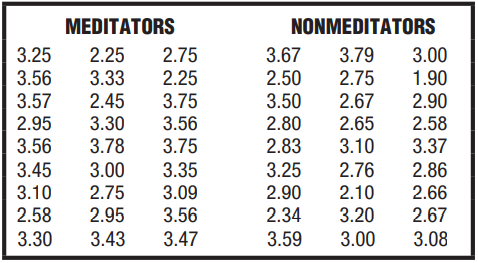 <br>
(a) What is the unit of measurement for these data? <br>
0.01. <br>
(b) Construct separate frequency distributions for meditators and for nonmeditators. (First, construct the frequency distribution for the group having the larger range. Then, to facilitate comparisons, use the same set of classes for the other frequency distribution.) <br>
(c) Do the two groups tend to differ? (Eventually, tools from inferential statistics, as described in Part 2, will help you decide whether any apparent difference between the two groups probably is real or merely transitory, that is, attributable to variability or chance. See Review Question 14.15 on page 271.)  <br>
Yes, they do.

In [ ]:
# Solution:
data_str = ["3.25 2.25 2.75 3.67 3.79 3.00",
            "3.56 3.33 2.25 2.50 2.75 1.90",
            "3.57 2.45 3.75 3.50 2.67 2.90",
            "2.95 3.30 3.56 2.80 2.65 2.58",
            "3.56 3.78 3.75 2.83 3.10 3.37",
            "3.45 3.00 3.35 3.25 2.76 2.86",
            "3.10 2.75 3.09 2.90 2.10 2.66",
            "2.58 2.95 3.56 2.34 3.20 2.67",
            "3.30 3.43 3.47 3.59 3.00 3.08"]
med_scores = list()
nonmed_scores = list()
for string in data_str:
    string = string.split()
    med_scores += [float(data) for data in string[:3]]
    nonmed_scores += [float(data) for data in string[3:]]
    
med_scores = np.array(med_scores)
nonmed_scores = np.array(nonmed_scores)

    # b):
    # Calculate the numbers needed to construct different classes:
class_range = nonmed_scores.max() - nonmed_scores.min()  # Since nonmeditator scores have larger range
interval = np.round(class_range / 10, decimals=1)
begin = nonmed_scores.min()

    # Construct classes and assign the frequencies to each class:
classes = list()
nonmed_freq = list()
med_freq = list()
for i in range(11):
    lower_lim = np.round(begin, decimals=2)
    upper_lim = np.round(begin + interval - 0.01, decimals=2)
    if upper_lim > 4.00:
        upper_lim = 4.00
        
    classes.append("{0}0 - {1}".format(lower_lim, upper_lim))
    nonmed_freq.append(nonmed_scores[(lower_lim <= nonmed_scores) & (nonmed_scores <= upper_lim)].size)
    med_freq.append(med_scores[(lower_lim <= med_scores) & (med_scores <= upper_lim)].size)
    begin += interval

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.1)

    # Customize the 1st plot:
ax[0].bar(classes, nonmed_freq, width=1,
          color="tab:blue", edgecolor="black")
ax[0].xaxis.set_major_locator(plt.FixedLocator(range(len(classes))))
ax[0].set_xticklabels(classes, 
                      fontdict={"fontsize": 15}, 
                      rotation=-90);
ax[0].yaxis.set_major_locator(plt.FixedLocator(range(0, max(med_freq) + 1)))
ax[0].set_yticklabels(range(0, max(med_freq) + 1),
                      fontdict={"fontsize": 15})
ax[0].set_title("Nonmeditators GPA Scores")

    # Customize the 2nd plot:
ax[1].bar(classes, med_freq, width=1,
          color="tab:gray", edgecolor="black",)
ax[1].xaxis.set_major_locator(plt.FixedLocator(range(len(classes))))
ax[1].set_xticklabels(classes, 
                      fontdict={"fontsize": 15}, 
                      rotation=-90);
ax[1].yaxis.set_major_locator(plt.FixedLocator(range(0, max(med_freq) + 1)))
ax[1].set_yticklabels(range(0, max(med_freq) + 1),
                      fontdict={"fontsize": 15});
ax[1].set_title("Meditators GPA Scores");

#### **2.17. Are there any conspicuous differences between the two distributions in the following table (one reflecting the ages of all residents of a small town and the other reflecting the ages of all U.S. residents)?**
(a) To help make the desired comparison, convert the frequencies (f) for the small town to percentages. <br>
(b) Describe any seemingly conspicuous differences between the two distributions. <br>
There's a conspicuous difference between the two distributions, that is: <br>
+The percentages of middle age to old people (from 40 and older) of "Small Town" distribution are clearly larger than those in "U.S. Population", and <br>
+The percentages of kids to adults (from 34 and younger) of "U.S. Population" distribution are clearly larger than those in "Small Town". <br>
<bg>(c) Using just one graph, construct frequency polygons for the two relative frequency distributions. <br>
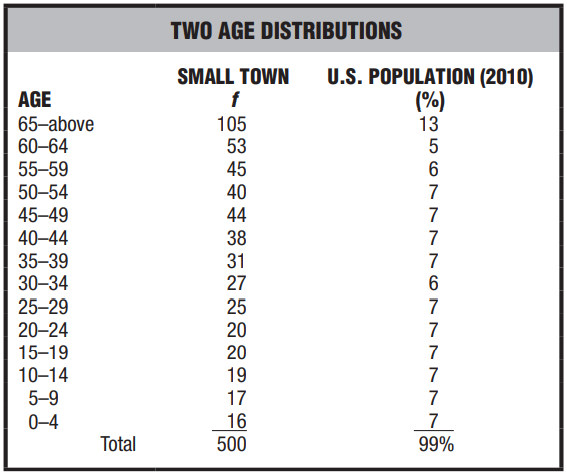

In [ ]:
# Solution:
    # a):
data_str = ["65–above 105 13",
            "60–64 53 5",
            "55–59 45 6",
            "50–54 40 7",
            "45–49 44 7",
            "40–44 38 7",
            "35–39 31 7",
            "30–34 27 6",
            "25–29 25 7",
            "20–24 20 7",
            "15–19 20 7",
            "10–14 19 7",
            "5–9 17 7",
            "0–4 16 7"]

classes = list()
smalltown_freq = list()
us_population = list()
for string in data_str:
    string = string.split()
    classes.append(string[0])
    smalltown_freq.append(int(string[1]))
    us_population.append(int(string[2]))
    
freq_dist = pd.DataFrame(data={"Small Town": smalltown_freq,
                               "U.S. Population (%)": us_population},
                         index=classes)
freq_dist["Small Town (%)"] = (freq_dist["Small Town"] / freq_dist["Small Town"].sum()) * 100
freq_dist.index.name = "Age"
cols = freq_dist.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:2]
freq_dist = freq_dist[cols]
freq_dist

In [ ]:
    # b):
fig = plt.figure()
ax = plt.axes()
ax.plot(freq_dist.index[::-1], freq_dist["Small Town (%)"][::-1],
        label="Small Town (%)", marker='o', markersize=4)
ax.plot(freq_dist.index[::-1], freq_dist["U.S. Population (%)"][::-1], color="green",
        label="U.S. Population (%)", marker='o', markersize=4)

ax.xaxis.set_major_locator(plt.FixedLocator(range(freq_dist.index.size)))
ax.set_xticklabels(freq_dist.index[::-1], rotation=-90);
ax.fill_between(freq_dist.index[::-1], freq_dist["Small Town (%)"][::-1], 
                facecolor="gray", alpha=0.4)
ax.fill_between(freq_dist.index[::-1], freq_dist["U.S. Population (%)"][::-1],
                facecolor="orange", alpha=0.3)

ax.set_xlabel("Age")
ax.set_ylabel("Percentage")
ax.legend(ncol=2, bbox_to_anchor=(0, 1.02), loc="lower left");

#### **2.18. The following table shows distributions of bachelor’s degrees earned in 2011–2012 for selected fields of study by all male graduates and by all female graduates.**
(a) How many female psychology majors graduated in 2011–2012? <br>
83.600. <br>
(b) Since the total numbers of male and female graduates are fairly different—600.0 thousand and 803.6 thousand—it is helpful to convert first to relative frequencies before making comparisons between male and female graduates. Then, inspect these relative frequencies and note what appear to be the most conspicuous differences between male and female graduates. <br>
There are significant differences between the allocations of male and female students in the fields of study, such as: <br>
Business, Engineering, Computer Sciences, Education, Health Sciences, Psychology. <br>
(c) Would it be meaningful to cumulate the frequencies in either of these frequency distributions? <br>
No, unless there's a way to order the fields of study based on certain characteristics. <br>
(d) Using just one graph, construct bar graphs for all male graduates and for all female graduates. Hint: Alternate shaded and unshaded bars for males and females, respectively. <br>
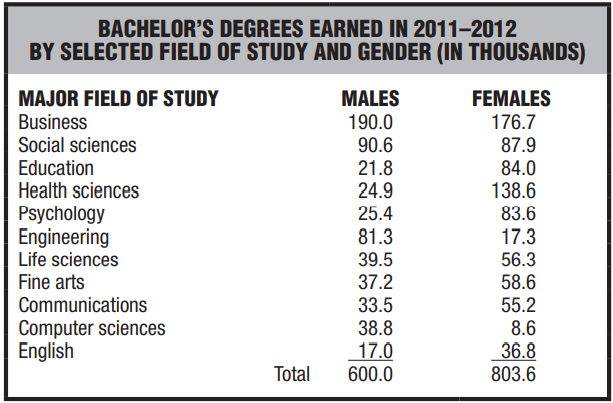

In [ ]:
# Solution:
data_str = ["Business 190.0 176.7",
            "Social sciences 90.6 87.9",
            "Education 21.8 84.0",
            "Health sciences 24.9 138.6",
            "Psychology 25.4 83.6",
            "Engineering 81.3 17.3",
            "Life sciences 39.5 56.3",
            "Fine arts 37.2 58.6",
            "Communications 33.5 55.2",
            "Computer sciences 38.8 8.6",
            "English 17.0 36.8"]

fostudy = list()
males = list()
females = list()
for string in data_str:
    string = string.split()
    if len(string) > 3:
        fostudy.append(" ".join(string[:2]))
        males.append(float(string[2]))
        females.append(float(string[3]))
    else:
        fostudy.append(string[0])
        males.append(float(string[1]))
        females.append(float(string[2]))

In [ ]:
    # b):
freq_dist = pd.DataFrame(data={"Males": males,
                               "Females": females},
                         index=fostudy)
freq_dist["Males(%)"] = np.round((freq_dist["Males"] / freq_dist["Males"].sum()) * 100, decimals=2)
freq_dist["Females(%)"] = np.round((freq_dist["Females"] / freq_dist["Females"].sum()) * 100, decimals=2)
freq_dist

In [ ]:
    # d):
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()

x = np.arange(freq_dist.index.size)
width = 0.35

male_bars = ax.bar(x - width/2, freq_dist["Males(%)"], width, label="Males")
female_bars = ax.bar(x + width/2, freq_dist["Females(%)"], width, label="Females")

ax.set_xticks(x, labels=freq_dist.index, rotation=-45)
ax.set_xlabel("Field of Study")
ax.set_ylabel("Percentage")
ax.set_title("Distributions of Males and Females Graduates")

ax.bar_label(male_bars, padding=3)
ax.bar_label(female_bars, padding=3);

In [ ]:
ax.bar_label?

#### **2.19. The following table is slightly more complex than previous tables, and shows both frequency distributions and relative frequency distributions of race/ethnicity for the U.S. population in 1980 and in 2010. It also shows the frequency (f) change and the percent (%) change of race/ethnicity between 1980 and 2010.**
(a) Which group changed the most in terms of the actual number of people? <br>
Hispanic. <br>
(b) Relative to its size in 1980, which group increased most? <br>
Hispanic. <br>
(c) Relative to its size in 1980, which group increased less rapidly than the general population? <br>
White. <br>
(d) What is the most striking trend in these data? <br>
That is the increasing number of hispanic people in the U.S.
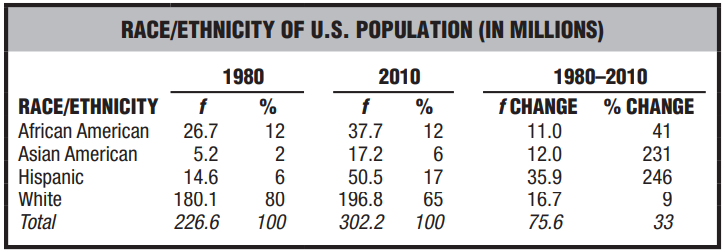

In [ ]:
# Solution:
data_str = ["African American 26.7 12 37.7 12 11.0 41",
            "Asian American 5.2 2 17.2 6 12.0 231",
            "Hispanic 14.6 6 50.5 17 35.9 246",
            "White 180.1 80 196.8 65 16.7 9",
            "Total 226.6 100 302.2 100 75.6 33"]

races = list()
f_1980 = list()
percent_1980 = list()
f_2010 = list()
percent_2010 = list()
f_1980_2010 = list()
percent_1980_2010 = list()
for string in data_str:
    string = string.split()
    if len(string) > 7:
        races.append(" ".join(string[:2]))
        f_1980.append(float(string[2]))
        percent_1980.append(float(string[3]))
        f_2010.append(float(string[4]))
        percent_2010.append(float(string[5]))
        f_1980_2010.append(float(string[6]))
        percent_1980_2010.append(float(string[7]))
    else:
        races.append(string[0])
        f_1980.append(float(string[1]))
        percent_1980.append(float(string[2]))
        f_2010.append(float(string[3]))
        percent_2010.append(float(string[4]))
        f_1980_2010.append(float(string[5]))
        percent_1980_2010.append(float(string[6]))

In [ ]:
data = np.array([f_1980, percent_1980,
                 f_2010, percent_2010,
                 f_1980_2010, percent_1980_2010])
data = data.T
cols = pd.MultiIndex.from_product([["1980", "2010", "1980-2010"], ["f", "(%)"]])
freq_dist = pd.DataFrame(data=data, index=races, columns=cols)
freq_dist

In [ ]:
    # a):
freq_dist[freq_dist[("1980-2010", "f")] == freq_dist.loc[:"White", ("1980-2010", "f")].max()]

In [ ]:
    # b):
freq_dist[("2010", "f")] / freq_dist[("1980", "f")] * 100